In [3]:
import tensorflow as tf  

mnist = tf.keras.datasets.mnist   
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

2023-10-31 15:31:40.794220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 15:31:40.794276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 15:31:40.794309: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 15:31:40.800383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 15:31:41.669292: W tensorflow/compiler/

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2023-10-31 15:31:47.721192: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 15:31:47.880779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 15:31:47.881099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
import time  
start_time = time.time()
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                 epochs = 10, batch_size = 100, verbose = 1)
print('Fit time: ', time.time() - start_time)

Epoch 1/10


2023-10-31 15:34:26.178481: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-10-31 15:34:26.334158: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-10-31 15:34:27.924366: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe7702cd950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 15:34:27.924387: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-10-31 15:34:27.928853: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 15:34:29.638429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-10-31 15:34:29.726769: I ./tensorflow/compiler/jit/device_compil

595/600 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9332

2023-10-31 15:34:31.247833: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2023-10-31 15:34:31.286389: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


600/600 [==============================] - 5s 3ms/step - loss: 0.2271 - accuracy: 0.9334 - val_loss: 0.1123 - val_accuracy: 0.9673
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.9748 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0825 - val_accuracy: 0.9750
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0702 - val_accuracy: 0.9782
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.0668 - val_accuracy: 0.9788
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0583 - val_accuracy: 0.9821
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 8/10
600/60

In [9]:
import matplotlib.pyplot as plt    
%matplotlib inline  

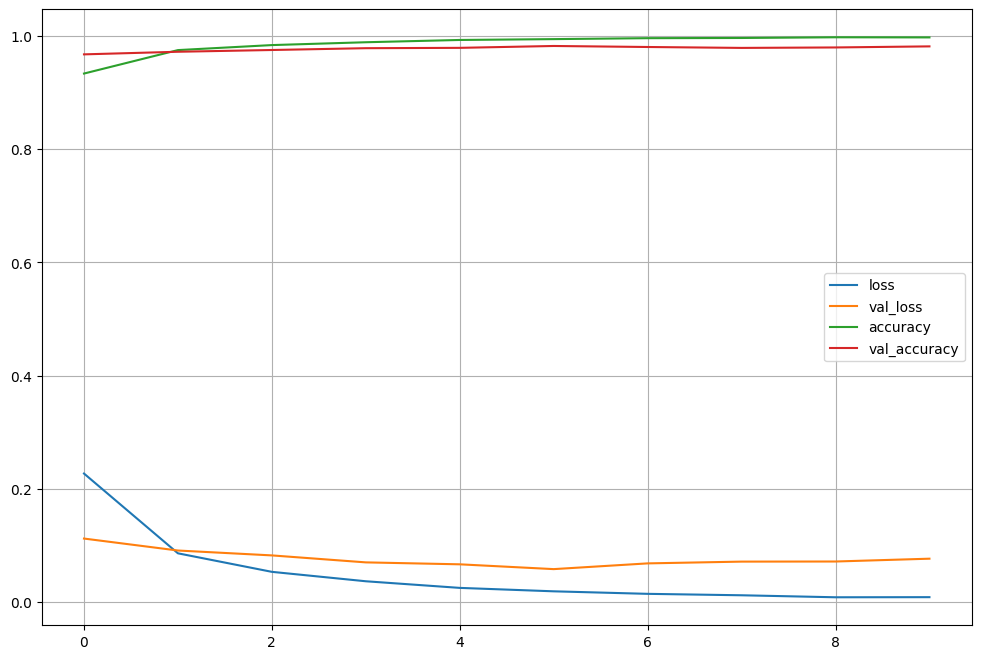

In [10]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

 36/313 [==>...........................] - ETA: 0s - loss: 0.0828 - accuracy: 0.9809 

2023-10-31 15:38:03.065168: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9814
Test loss : 0.07673143595457077
Test accuracy : 0.9814000129699707


In [12]:
import numpy as np
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]
  

313/313 [==============================] - 0s 898us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

186

In [15]:
import random
samples = random.choices(population = wrong_result, k = 16)
samples

[1414,
 2118,
 956,
 3559,
 9587,
 6625,
 4437,
 3490,
 3060,
 2118,
 1717,
 290,
 4294,
 4639,
 9679,
 5955]

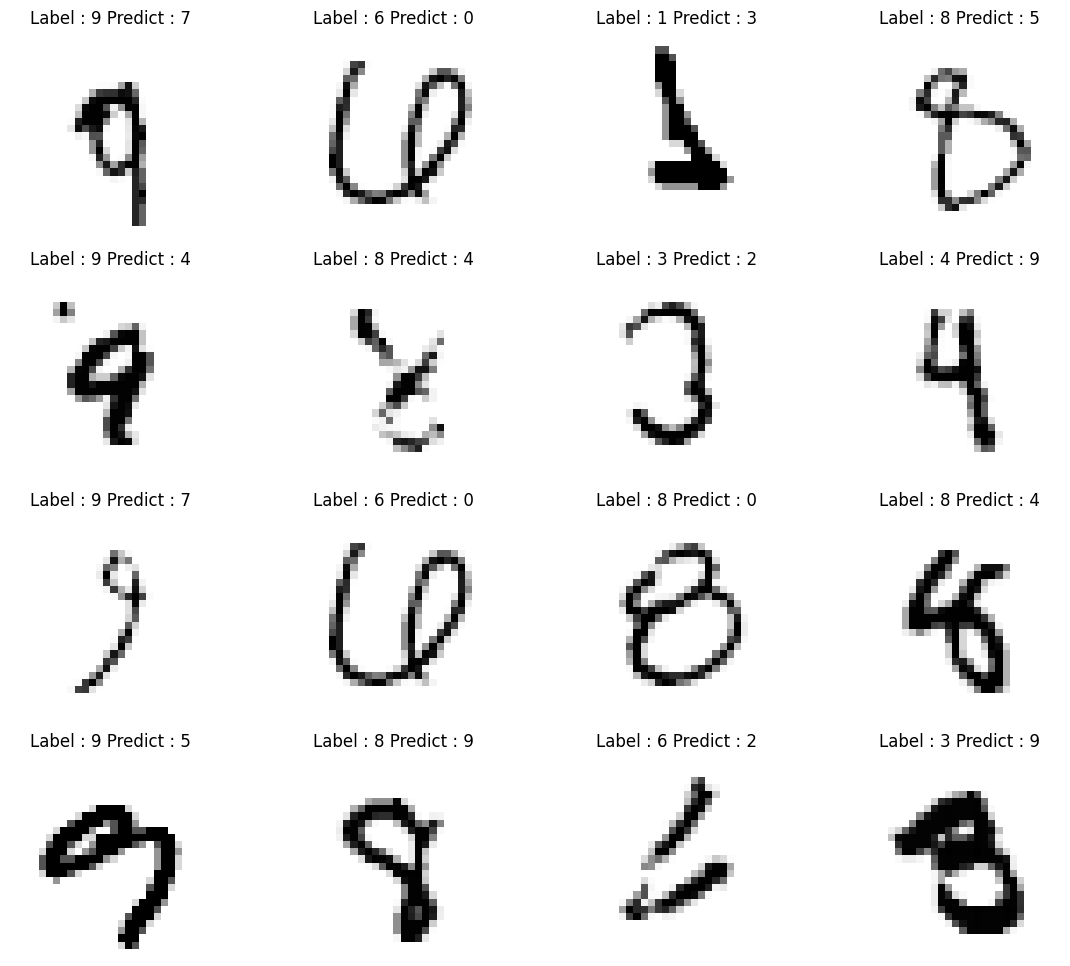

In [16]:
plt.figure(figsize = (14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()